In [457]:
import numpy as np

In [458]:
import pandas as pd

In [459]:
data = pd.read_csv("train.csv")

In [460]:
data = data.set_index('PassengerId')

In [461]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [462]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [463]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [465]:
data["Age"] = data["Age"].fillna(29.69)

In [466]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [467]:
a = data["Embarked"].mode().iloc[0]
a

'S'

In [468]:
data["Embarked"] = data["Embarked"].fillna(a)

In [469]:
b = data['Cabin'].mode().iloc[0]
b

'B96 B98'

In [470]:
data["Cabin"] = data["Cabin"].fillna(b)

In [471]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [472]:
data.drop(["Name","Ticket","SibSp","Parch","Cabin","Sex"],axis = 1 ,inplace = True)

In [473]:
data1 = pd.get_dummies(data)

In [474]:
data1

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,0,3,22.00,7.2500,0,0,1
2,1,1,38.00,71.2833,1,0,0
3,1,3,26.00,7.9250,0,0,1
4,1,1,35.00,53.1000,0,0,1
5,0,3,35.00,8.0500,0,0,1
...,...,...,...,...,...,...,...
887,0,2,27.00,13.0000,0,0,1
888,1,1,19.00,30.0000,0,0,1
889,0,3,29.69,23.4500,0,0,1


In [475]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [476]:
data1.corr()

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069783,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331387,-0.549500,-0.243292,0.221009,0.074053
Age,-0.069783,-0.331387,1.000000,0.091594,0.032015,-0.013950,-0.019268
Fare,0.257307,-0.549500,0.091594,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,0.168240,-0.243292,0.032015,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.013950,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.019268,-0.162184,-0.782742,-0.499421,1.000000


In [477]:
target = data['Survived']

In [478]:
target.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [479]:
features= data1.drop(['Survived'],axis=1)

In [480]:
from sklearn.preprocessing import StandardScaler 

In [481]:
scalar = StandardScaler()

In [482]:
features_scaled = scalar.fit_transform(features)

In [483]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,log_loss,precision_recall_curve,precision_score,accuracy_score,recall_score

In [484]:
from sklearn.model_selection import train_test_split as tts

In [498]:
X_train, X_test,y_train, y_test = tts(features_scaled, target, test_size =0.2,random_state = 42)

In [499]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,log_loss,precision_recall_curve,precision_score,accuracy_score,recall_score

In [500]:
lr = LogisticRegression()

In [501]:
# lr.fit(features_train,target_train)

# d = pd.read_csv("test.csv")

# d.head()

# d = d.set_index('PassengerId')
# d.drop(["Name","Ticket","SibSp","Parch","Cabin","Sex"],axis = 1 ,inplace = True)
# features_test = pd.get_dummies(d)

# features_test.isnull().sum()

# features_test.describe()

# features_test["Age"] = features_test["Age"].fillna(30.27)

# features_test["Fare"] = features_test["Fare"].fillna(35.62)

# prediction = lr.predict(features_test)

In [502]:
lr.fit(X_train,y_train)

LogisticRegression()

In [503]:
prediction = lr.predict(X_test)

In [504]:
predtprob = lr.predict_proba(X_test)
predt

array([[0.70136266, 0.29863734],
       [0.62768931, 0.37231069],
       [0.74758502, 0.25241498],
       [0.42358013, 0.57641987],
       [0.59659044, 0.40340956],
       [0.32325762, 0.67674238],
       [0.67674925, 0.32325075],
       [0.71747199, 0.28252801],
       [0.58030069, 0.41969931],
       [0.31413107, 0.68586893],
       [0.42014616, 0.57985384],
       [0.85968427, 0.14031573],
       [0.78962396, 0.21037604],
       [0.70871329, 0.29128671],
       [0.66055046, 0.33944954],
       [0.2861347 , 0.7138653 ],
       [0.45787849, 0.54212151],
       [0.67669318, 0.32330682],
       [0.59700717, 0.40299283],
       [0.49610708, 0.50389292],
       [0.76978275, 0.23021725],
       [0.41892788, 0.58107212],
       [0.74186765, 0.25813235],
       [0.74679042, 0.25320958],
       [0.79545822, 0.20454178],
       [0.67218777, 0.32781223],
       [0.34274689, 0.65725311],
       [0.6257969 , 0.3742031 ],
       [0.63094465, 0.36905535],
       [0.80523633, 0.19476367],
       [0.

In [505]:
f1_score(y_pred=prediction,y_true=y_test)

0.5950413223140495

In [506]:
accuracy_score(y_pred=prediction,y_true=y_test)

0.7262569832402235

In [507]:
confusion_matrix(y_test,prediction)

array([[94, 11],
       [38, 36]])

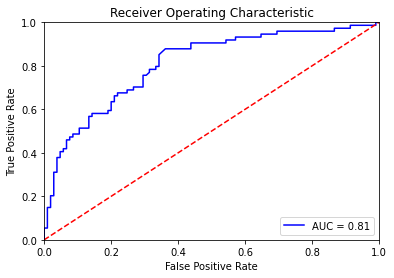

In [508]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = predtprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#print(fpr,tpr,threshold)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [496]:
precision_score(y_test,prediction)

0.7659574468085106

In [497]:
recall_score(y_test,prediction)

0.4864864864864865